# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

**b)** Why is it bad for a model to have too many degrees of freedom?

**c)** Why is it bad for a model to have too few degrees of freedom?

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

**e)** Why might we want to use Ridge regression instead of OLS?

**f)** Why migth we want to use OLS instead of Ridge regression?

**Answer:**$\\$
a) The model has 4 degrees of freedom.$\\$
b) If the model has too many degrees of freedom it will be prone to overfitting since the model can store more information than are in the data. $\\$
c) If the model has too few degrees of freedom it will probably underfit. The model can't store all the information in the data and hence wont be able to fully learn all the features. $\\$
d) The degrees of freedom are given by 
$$
\text{df}(\lambda) 
= \operatorname{tr}\!\left[ X (X^{T}X + \lambda I)^{-1} X^{T} \right], 
= \operatorname{tr}(H_\lambda), 
= \sum_{j=1}^{p} \frac{d_j^{2}}{d_j^{2} + \lambda}.
$$
e) Ridge regression shrinks the parameteres of the model and hence reduces overfitting. $\\$
f) Ridge regression is a little more complicated and has a small bias. If the parameters of OLS doesn't blow up, it will be a bit better than ridge regression. 


## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

We want to find the optimal parameter of $\beta$. We want to optimize 
$${\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2$$
Meaning, we want to find $\beta$ so that the derivative of what we take the minimum of is $0$. $\\$
We will just assume that when we write $\lambda$ we acctaully mean $\frac{\lambda'}{n}$ for some $\lambda'$.$\\$
We have that 
$$
\frac{\partial{||y-X\beta ||_2^2+\lambda ||\beta ||_2^2}}{\partial{\beta}}=
\frac{\partial{||y-X\beta ||_2^2}}{\partial{\beta}}+\frac{\partial{\lambda \beta^TI_p\beta}}{\partial{\beta}}
$$
we computed both these derivatives last week, so we get 
$$
=-2(y-X\beta)^TX+\beta^T\lambda(I_p+I_p^T)
$$

$$
=-2y^TX+2\beta^TX^TX+\beta^T\lambda(2I_p)
$$
Setting this equal to $0$ we get 
$$
y^TX=\beta^T\lambda I_p+\beta^TX^TX
$$
$$
y^TX=\beta^T(\lambda I_p + X^TX)
$$
$$
X^Ty=(\lambda I_p+X^TX)\beta
$$
So the optimal parametere is 
$$
\beta_\text{ridge} = (\lambda I_p+X^TX)^{-1}X^Ty
$$


## Exercise 3 - Scaling data

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [209]:
n = 1000
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [210]:
def polynomial_features(x : np.array, p : int, intercept : bool = True) -> np.array:
    return x[:, None] ** np.arange(int(intercept), p+1)

**b)** Split your data into training and test data(80/20 split)

In [211]:
X = polynomial_features(x, 3)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [212]:
def scale(xtrain, xtest, ytrian):
    scaler = StandardScaler()
    scaler.fit(xtrain)

    x_scaled_train = scaler.transform(xtrain)
    x_scaled_test = scaler.transform(xtest)
    y_offset = np.mean(ytrian)
    return x_scaled_train, x_scaled_test, y_offset

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [213]:
def getRidgeParam(x : np.array, y : np.array, l : int) -> np.array:
    return np.linalg.inv(l*np.identity(x.shape[1]) + x.T @ x) @ x.T @ y

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

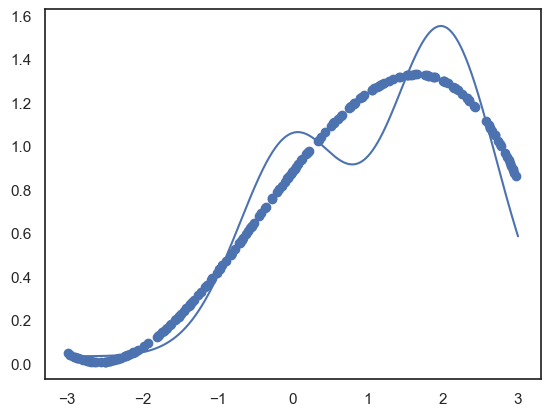

In [214]:
x_scaled_train, x_scaled_test, y_offset = scale(X_train, X_test, Y_train)

l = 0.1
beta = getRidgeParam(x_scaled_train, Y_train, l)

pred = x_scaled_test @ beta + y_offset
plt.scatter(X_test.T[0], pred)
plt.plot(x, y)
plt.show()

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

In [215]:
def MSE(x, y):
    return np.sum((x - y)**2) / x.shape[0]

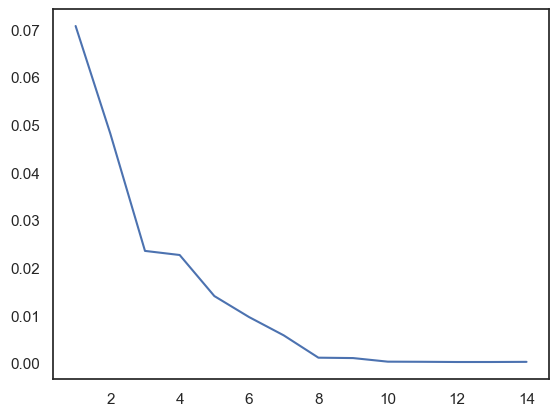

In [216]:
mse = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

l = 0.001
xVals = np.arange(1, 15)
for i in xVals:
    featMat = polynomial_features(x_train, i)
    featMatTest = polynomial_features(x_test, i)

    featMatScaled, featMatTestScaled, y_offset = scale(featMat, featMatTest, y_train)
    
    beta = getRidgeParam(featMatScaled, y_train, l)
    
    mse.append(MSE(featMatTestScaled@beta + y_offset, y_test))

plt.plot(xVals, mse)
plt.show()
    

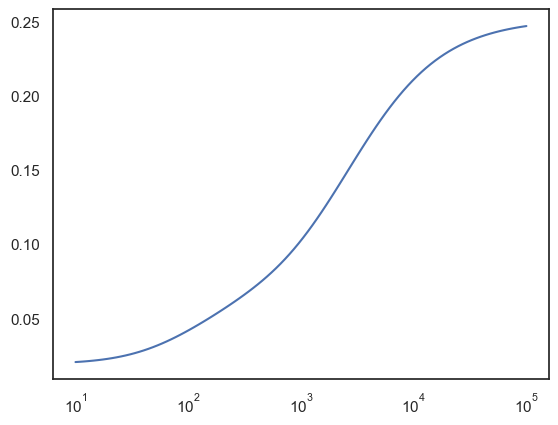

In [217]:
mse = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
featMat = polynomial_features(x_train, 3)
featMatTest = polynomial_features(x_test, 3)
featMatScaled, featMatTestScaled, y_offset = scale(featMat, featMatTest, y_train)

lambdaVals = np.logspace(1, 5, 100, base=10)
for l in lambdaVals:
    
    beta = getRidgeParam(featMatScaled, y_train, l)
    
    mse.append(MSE(featMatTestScaled@beta + y_offset, y_test))

plt.plot(lambdaVals, mse)
plt.xscale("log")
plt.show()

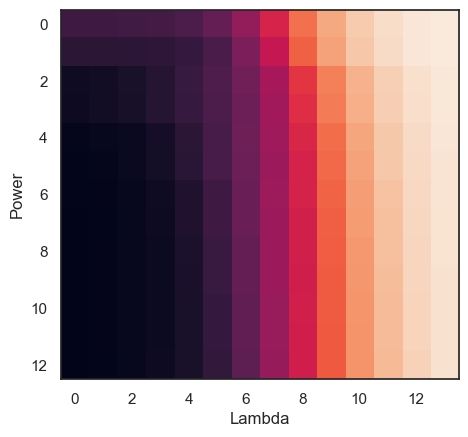

In [218]:
mse = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

xVals = range(1, 14)
lambdaVals = np.logspace(1, 5, 14, base=10)

for i in xVals:
    featMat = polynomial_features(x_train, i)
    featMatTest = polynomial_features(x_test, i)
    featMatScaled, featMatTestScaled, y_offset = scale(featMat, featMatTest, y_train)

    mseTemp = []
    for l in lambdaVals:
        beta = getRidgeParam(featMatScaled, y_train, l)
        mseTemp.append(MSE(featMatTestScaled@beta + y_offset, y_test))
    mse.append(mseTemp)


mse = np.array(mse)
plt.imshow(np.array(mse))
plt.xlabel("Lambda")
plt.ylabel("Power")
plt.show()
    